<a href="https://colab.research.google.com/github/iam-fern/Generate_addition_2X/blob/main/GQtest_data(y_hat)_add_delta_(3_6)_n250_05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import os
import statistics as stats
import scipy.stats as ss
from scipy.stats import f_oneway
from scipy import stats
from google.colab import drive
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_addition_2X/addition_delta_3.6'

In [4]:
os.listdir(base_path)

['data_add_delta_3.6_n250.csv',
 'data_add_delta_3.6_n120.csv',
 'data_add_delta_3.6_n60.csv',
 'data_add_delta_3.6_n30.csv',
 'data_add_delta_3.6_n20.csv']

In [5]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_add_delta_3.6_n250.csv')
pd.read_csv(file_path)

,rep,index,x1,x2,e,Y,y_hat,e_hat
0,0.0,0.0,31.456873,97.920701,-1183.557234,-1044.179660,176.984955,-1221.164614
1,0.0,1.0,35.780488,23.114531,282.774137,351.669156,-229.504221,581.173378
2,0.0,2.0,62.736089,42.810979,378.650687,494.197755,41.527253,452.670501
3,0.0,3.0,79.200952,41.721532,331.261081,462.183565,131.355824,330.827740
4,0.0,4.0,33.688009,30.650110,-231.308119,-156.970000,-198.229289,41.259289
...,...,...,...,...,...,...,...,...
249995,999.0,245.0,91.675835,28.513648,-363.553805,-233.364322,341.288342,-574.652664
249996,999.0,246.0,37.562145,53.100949,757.892096,858.555190,-79.693604,938.248794
249997,999.0,247.0,28.070917,34.235004,519.315371,591.621291,-70.914217,662.535507
249998,999.0,248.0,68.197292,82.757080,-2264.679444,-2103.725072,3.314003,-2107.039075


In [6]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,e,Y,y_hat,e_hat
0,0.0,0.0,31.456873,97.920701,-1183.557234,-1044.179660,176.984955,-1221.164614
1,0.0,1.0,35.780488,23.114531,282.774137,351.669156,-229.504221,581.173378
2,0.0,2.0,62.736089,42.810979,378.650687,494.197755,41.527253,452.670501
3,0.0,3.0,79.200952,41.721532,331.261081,462.183565,131.355824,330.827740
4,0.0,4.0,33.688009,30.650110,-231.308119,-156.970000,-198.229289,41.259289
...,...,...,...,...,...,...,...,...
249995,999.0,245.0,91.675835,28.513648,-363.553805,-233.364322,341.288342,-574.652664
249996,999.0,246.0,37.562145,53.100949,757.892096,858.555190,-79.693604,938.248794
249997,999.0,247.0,28.070917,34.235004,519.315371,591.621291,-70.914217,662.535507
249998,999.0,248.0,68.197292,82.757080,-2264.679444,-2103.725072,3.314003,-2107.039075


In [7]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2            e            Y       y_hat  \
rep   index                                                               
0.0   0.0    31.456873  97.920701 -1183.557234 -1044.179660  176.984955   
      1.0    35.780488  23.114531   282.774137   351.669156 -229.504221   
      2.0    62.736089  42.810979   378.650687   494.197755   41.527253   
      3.0    79.200952  41.721532   331.261081   462.183565  131.355824   
      4.0    33.688009  30.650110  -231.308119  -156.970000 -198.229289   
...                ...        ...          ...          ...         ...   
999.0 245.0  91.675835  28.513648  -363.553805  -233.364322  341.288342   
      246.0  37.562145  53.100949   757.892096   858.555190  -79.693604   
      247.0  28.070917  34.235004   519.315371   591.621291  -70.914217   
      248.0  68.197292  82.757080 -2264.679444 -2103.725072    3.314003   
      249.0  90.851020  82.644004  -289.488800  -105.993775  143.265102   

                   e_hat  
rep   index               
0.0   0.0   -1221.164614  
      1.0     581.173378  
      2.0     452.670501  
      3.0     330.827740  
      4.0      41.259289  
...                  ...  
999.0 245.0  -574.652664  
      246.0   938.248794  
      247.0   662.535507  
      248.0 -2107.039075  
      249.0  -249.258878  

[250000 rows x 6 columns]

In [8]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2            e            Y       y_hat  \
rep   index                                                               
0.0   0.0    31.456873  97.920701 -1183.557234 -1044.179660  176.984955   
      1.0    35.780488  23.114531   282.774137   351.669156 -229.504221   
      2.0    62.736089  42.810979   378.650687   494.197755   41.527253   
      3.0    79.200952  41.721532   331.261081   462.183565  131.355824   
      4.0    33.688009  30.650110  -231.308119  -156.970000 -198.229289   
...                ...        ...          ...          ...         ...   
999.0 245.0  91.675835  28.513648  -363.553805  -233.364322  341.288342   
      246.0  37.562145  53.100949   757.892096   858.555190  -79.693604   
      247.0  28.070917  34.235004   519.315371   591.621291  -70.914217   
      248.0  68.197292  82.757080 -2264.679444 -2103.725072    3.314003   
      249.0  90.851020  82.644004  -289.488800  -105.993775  143.265102   

                   e_hat  
rep   index               
0.0   0.0   -1221.164614  
      1.0     581.173378  
      2.0     452.670501  
      3.0     330.827740  
      4.0      41.259289  
...                  ...  
999.0 245.0  -574.652664  
      246.0   938.248794  
      247.0   662.535507  
      248.0 -2107.039075  
      249.0  -249.258878  

[250000 rows x 6 columns]

In [9]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,e,Y,y_hat,e_hat
0,0.0,0.0,31.456873,97.920701,-1183.557234,-1044.179660,176.984955,-1221.164614
1,0.0,1.0,35.780488,23.114531,282.774137,351.669156,-229.504221,581.173378
2,0.0,2.0,62.736089,42.810979,378.650687,494.197755,41.527253,452.670501
3,0.0,3.0,79.200952,41.721532,331.261081,462.183565,131.355824,330.827740
4,0.0,4.0,33.688009,30.650110,-231.308119,-156.970000,-198.229289,41.259289
...,...,...,...,...,...,...,...,...
249995,999.0,245.0,91.675835,28.513648,-363.553805,-233.364322,341.288342,-574.652664
249996,999.0,246.0,37.562145,53.100949,757.892096,858.555190,-79.693604,938.248794
249997,999.0,247.0,28.070917,34.235004,519.315371,591.621291,-70.914217,662.535507
249998,999.0,248.0,68.197292,82.757080,-2264.679444,-2103.725072,3.314003,-2107.039075


In [10]:
table.set_index(['rep', 'index'], inplace=True)

In [11]:
table

x1         x2            e            Y       y_hat  \
rep   index                                                               
0.0   0.0    31.456873  97.920701 -1183.557234 -1044.179660  176.984955   
      1.0    35.780488  23.114531   282.774137   351.669156 -229.504221   
      2.0    62.736089  42.810979   378.650687   494.197755   41.527253   
      3.0    79.200952  41.721532   331.261081   462.183565  131.355824   
      4.0    33.688009  30.650110  -231.308119  -156.970000 -198.229289   
...                ...        ...          ...          ...         ...   
999.0 245.0  91.675835  28.513648  -363.553805  -233.364322  341.288342   
      246.0  37.562145  53.100949   757.892096   858.555190  -79.693604   
      247.0  28.070917  34.235004   519.315371   591.621291  -70.914217   
      248.0  68.197292  82.757080 -2264.679444 -2103.725072    3.314003   
      249.0  90.851020  82.644004  -289.488800  -105.993775  143.265102   

                   e_hat  
rep   index               
0.0   0.0   -1221.164614  
      1.0     581.173378  
      2.0     452.670501  
      3.0     330.827740  
      4.0      41.259289  
...                  ...  
999.0 245.0  -574.652664  
      246.0   938.248794  
      247.0   662.535507  
      248.0 -2107.039075  
      249.0  -249.258878  

[250000 rows x 6 columns]

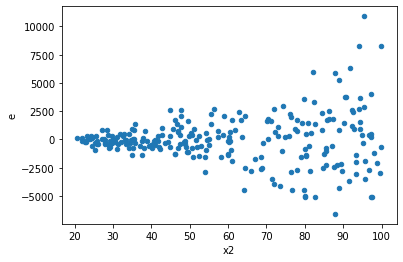

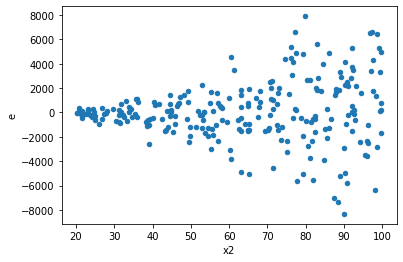

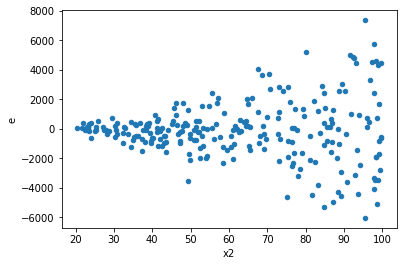

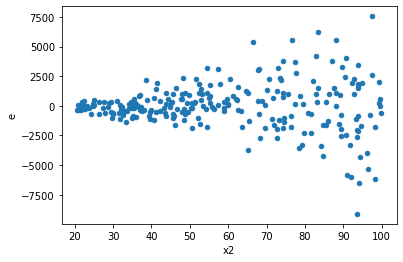

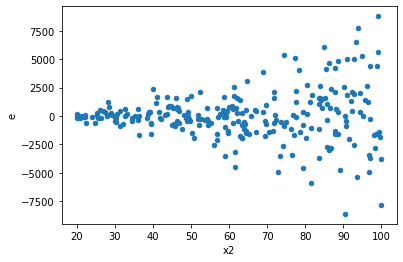

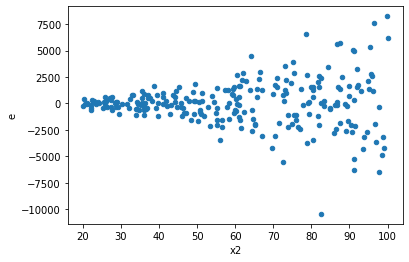

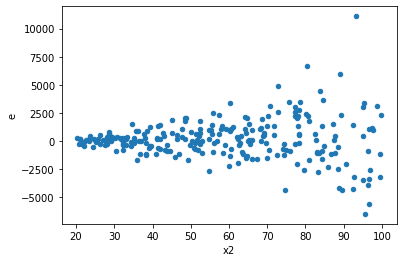

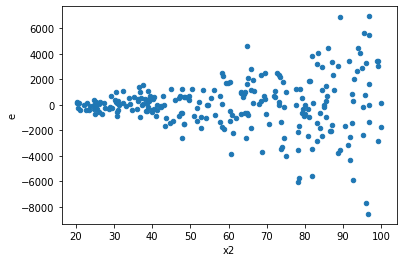

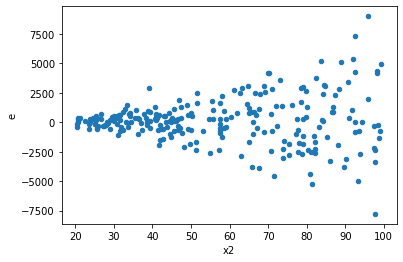

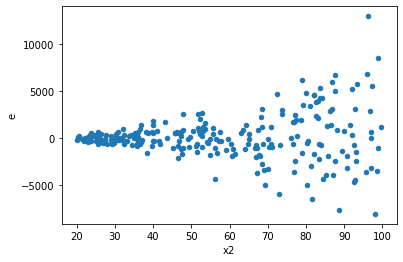

In [12]:
tablenew0 = table.loc[0.0]
tablenew1 = table.loc[1.0]
tablenew2 = table.loc[2.0]
tablenew3 = table.loc[3.0]
tablenew4 = table.loc[4.0]
tablenew5 = table.loc[5.0]
tablenew6 = table.loc[6.0]
tablenew7 = table.loc[7.0]
tablenew8 = table.loc[8.0]
tablenew9 = table.loc[9.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [13]:
def get_result(run_replicate, percent_data):
    new_table = table.loc[run_replicate]

    # เรียง data จากน้อยไปมากตาม y_hat
    new_table_sort = new_table.sort_values('y_hat')
    new_table_sort.reset_index(inplace=True)
    new_table_sort.drop(['index'], axis=1, inplace=True)

    # แบ่งข้อมูลกลุ่มที่ 1
    table1 = new_table_sort.iloc[:int(percent_data*new_table_sort.shape[0]) , :]
    y = table1['Y']
    x = table1[['x1', 'x2']]
    # add constant to predictor variable
    x = sm.add_constant(x)
    # fit linear regression model
    model1 = sm.OLS(y, x).fit()

    # หาค่า df กลุ่ม 1
    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1

    # แบ่งข้อมูลกลุ่มที่ 2
    table2 = new_table_sort.iloc[int((1-percent_data)*new_table_sort.shape[0]): , :]

    y = table2['Y']
    x = table2[['x1', 'x2']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()
    #print(model.summary())

    # หาค่า df กลุ่ม 2
    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # ค่าสถิติทดสอบ
    GQ_test = (SSE2/DF2) / (SSE1/DF1)

    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test, df2, df1)))
    p_greater = ss.f.cdf(GQ_test, df2, df1)
    p_less = 1.0-ss.f.cdf(GQ_test, df2, df1)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]

# กำหนด % การแบ่งข้อมูล
percent_data=0.4

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less=get_result(run_replicate, percent_data)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test.append(GQ_test)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
0.0,98.0,98.0,154648634.0243181,849776436.0245507,1578047.2859624296,8671188.122699497,5.494884849037371,1.5543122344752192e-15,0.9999999999999992,7.771561172376096e-16,Reject005=0 : Heteroscedasticity
1.0,98.0,98.0,119090591.43960479,1172307314.7860687,1215210.1167306611,11962319.538633354,9.843828136335931,2.220446049250313e-16,0.9999999999999999,1.1102230246251565e-16,Reject005=0 : Heteroscedasticity
2.0,98.0,98.0,258589650.59016463,467951731.8556139,2638669.9039812717,4775017.67199606,1.8096305509042374,0.0036452305012950603,0.9981773847493525,0.0018226152506475302,Reject005=0 : Heteroscedasticity
4.0,98.0,98.0,305443027.2895635,709603109.7170348,3116765.5845873826,7240848.05833709,2.323193022325315,4.0850693128202664e-05,0.9999795746534359,2.0425346564101332e-05,Reject005=0 : Heteroscedasticity
5.0,98.0,98.0,271865414.4292055,578676121.8898135,2774136.881930668,5904858.38663075,2.128538943082451,0.00022706830396401756,0.999886465848018,0.00011353415198200878,Reject005=0 : Heteroscedasticity
7.0,98.0,98.0,191519392.38508114,587137433.9417711,1954279.514133481,5991198.305528277,3.0656813737234243,6.81207776853654e-08,0.9999999659396112,3.40603888426827e-08,Reject005=0 : Heteroscedasticity
8.0,98.0,98.0,362388577.19399035,460404867.7012192,3697842.624428473,4698008.854094073,1.2704729030538942,0.23780367851649942,0.8810981607417503,0.11890183925824971,Reject005=1 : Homoscedasticity
9.0,98.0,98.0,40649359.74757253,1303638574.1193695,414789.3851793115,13302434.429789485,32.07033474118173,2.220446049250313e-16,0.9999999999999999,1.1102230246251565e-16,Reject005=0 : Heteroscedasticity
12.0,98.0,98.0,269513451.29597276,606863455.2959034,2750137.2581221713,6192484.237713301,2.2517000631239794,7.670013689842214e-05,0.9999616499315508,3.835006844921107e-05,Reject005=0 : Heteroscedasticity


In [15]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                                  if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

#result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,98.0,98.0,154648634.0243181,849776436.0245507,1578047.2859624296,8671188.122699497,5.494884849037371,1.5543122344752192e-15,Reject005=0 : Heteroscedasticity
1.0,98.0,98.0,119090591.43960479,1172307314.7860687,1215210.1167306611,11962319.538633354,9.843828136335931,2.220446049250313e-16,Reject005=0 : Heteroscedasticity
2.0,98.0,98.0,258589650.59016463,467951731.8556139,2638669.9039812717,4775017.67199606,1.8096305509042374,0.0036452305012950603,Reject005=0 : Heteroscedasticity
3.0,98.0,98.0,725314976.9879385,80724896.9129134,7401173.234570801,823723.4378868714,0.11129633259214472,1.9366446504759214e-23,Reject005=0 : Heteroscedasticity
4.0,98.0,98.0,305443027.2895635,709603109.7170348,3116765.5845873826,7240848.05833709,2.323193022325315,4.0850693128202664e-05,Reject005=0 : Heteroscedasticity
5.0,98.0,98.0,271865414.4292055,578676121.8898135,2774136.881930668,5904858.38663075,2.128538943082451,0.00022706830396401756,Reject005=0 : Heteroscedasticity
6.0,98.0,98.0,357844305.9034414,289722857.2259782,3651472.50921879,2956355.6859793696,0.8096338336152128,0.2975845378789569,Reject005=1 : Homoscedasticity
7.0,98.0,98.0,191519392.38508114,587137433.9417711,1954279.514133481,5991198.305528277,3.0656813737234243,6.81207776853654e-08,Reject005=0 : Heteroscedasticity
8.0,98.0,98.0,362388577.19399035,460404867.7012192,3697842.624428473,4698008.854094073,1.2704729030538942,0.23780367851649942,Reject005=1 : Homoscedasticity


In [16]:
result_show['Result_test'].value_counts()

Reject005=0 : Heteroscedasticity    860
Reject005=1 : Homoscedasticity      140
Name: Result_test, dtype: int64